In [17]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 패션 MNIST

In [ ]:
from tensorflow import keras

# 데이터 불러오기
# 훈련데이터 6만장, 테스트 데이터 1만장
# 훈련 데이터는 학생이 공부하는 교과서
# 테스트 데이터는 얼마나 잘 배웠는지 확인하는 시험문제
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

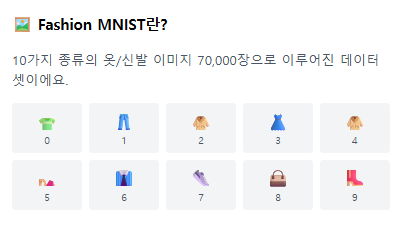

In [ ]:
# 각 이미지가 어떤 형태인지 알아봄
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


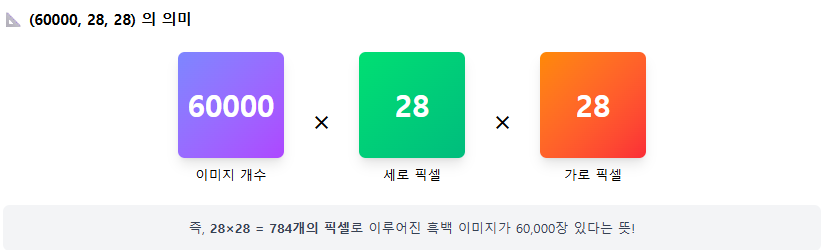

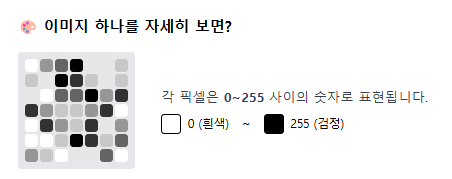

In [46]:
# 테스트 데이터도 형태 알아보기
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


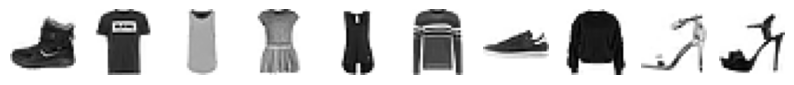

In [ ]:
# 이해하기 쉽게 이미지로 보기

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))
# 이미지 10개를 한줄에 그림

for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    # 이미지를 화면에 표시함. 흑백이미지로
    axs[i].axis('off')
    # 축 제거 (깔끔하게 보이게)
plt.show()

In [ ]:
# 처음 10장의 정답 출력
print([train_target[i] for i in range(10)])

[np.uint8(9), np.uint8(0), np.uint8(0), np.uint8(3), np.uint8(0), np.uint8(2), np.uint8(7), np.uint8(2), np.uint8(5), np.uint8(5)]


In [ ]:
import numpy as np

# 각 옷 종류가 몇 장 있는지 확인
print(np.unique(train_target, return_counts=True))
# 데이터가 균형 잡혀 있는지 체크함

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


## 로지스틱 회귀로 패션 아이템 분류하기

In [ ]:
# 신경망이 학습하기 좋게 데이터를 가공
train_scaled = train_input / 255.0
# 정규화: 0~255 → 0~1 범위로 변환
train_scaled = train_scaled.reshape(-1, 28*28)
# 1차원으로 펴기: (28, 28) → (784,)

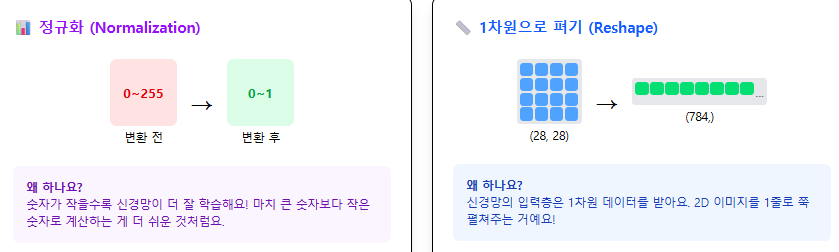

In [25]:
print(train_scaled.shape)

(60000, 784)


In [27]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)

scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.81945


## 인공신경망

### 텐서플로와 케라스

In [28]:
import tensorflow as tf

In [29]:
from tensorflow import keras

## 인공신경망으로 모델 만들기

In [30]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [31]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [32]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


In [ ]:
# 인공신경망 만들기
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))
# 출력층 만들기

c:\Users\User\.conda\envs\DL\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 신경망 모델 만들기
model = keras.Sequential([dense])

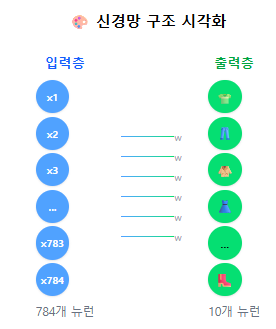

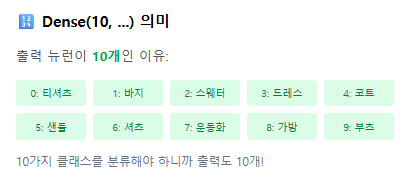
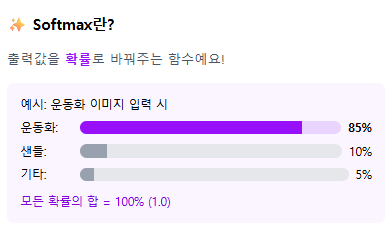

## 인공신경망으로 패션 아이템 분류하기

In [ ]:
# 모델 컴파일 (설정)
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [36]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [ ]:
# 학습 시작
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7947 - loss: 0.6069
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8388 - loss: 0.4742
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8470 - loss: 0.4501
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8512 - loss: 0.4374
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8544 - loss: 0.4291


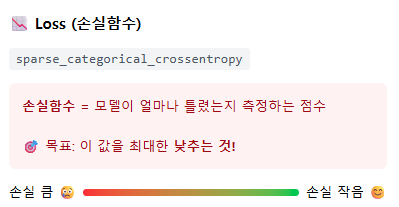
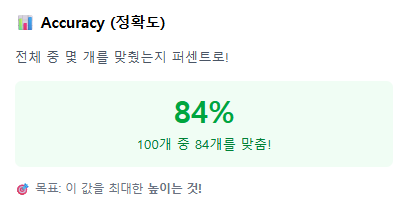
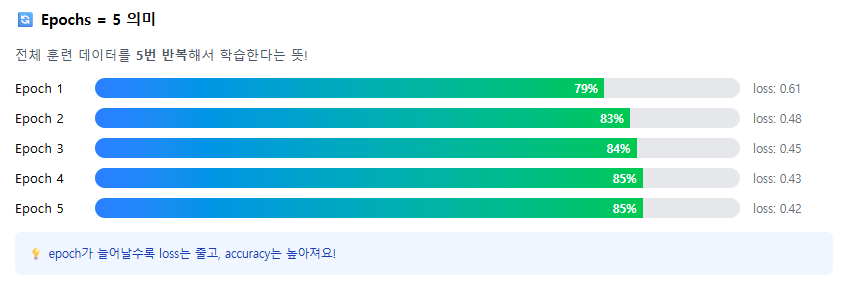

In [ ]:
# 학습이 잘 됐는지 검증 데이터로 평가
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8458 - loss: 0.4444


[0.4444445073604584, 0.8458333611488342]

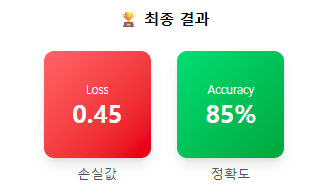

# 전체 요약
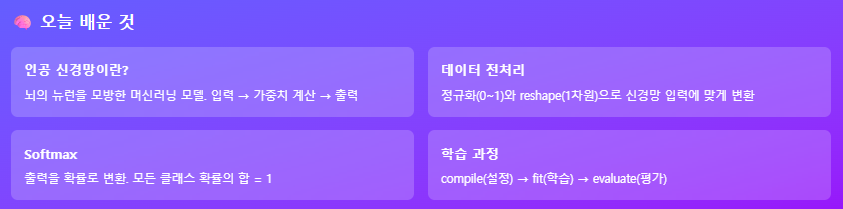
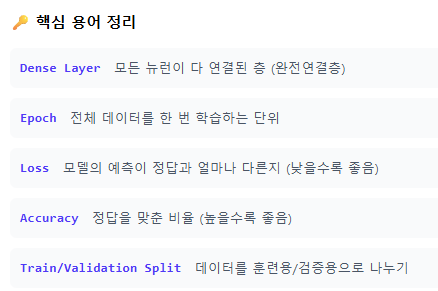